In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from src import image_selection
from src.Tile import Tile

# Filtering by contrast

Now that we have square images, I am going to filter out low contrasting images using `get_tile_contrast` function that I defined in `src.image_metrics`. The function will chop image into equal squares and check contrast in each of them separately in order to remove images with solid backgrounds as well as low-contrast images

In [3]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/hand painted tile',
    'dataset/bing/handmade tile',
    'dataset/bing/portuguese tile'
]

Working on dataset/google/azulejo folder.


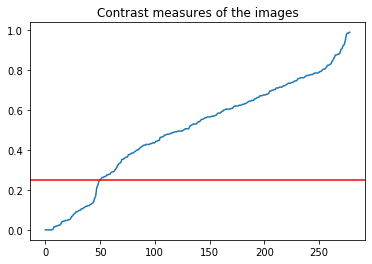

Random sample of low-contrast files - they didn't make it.


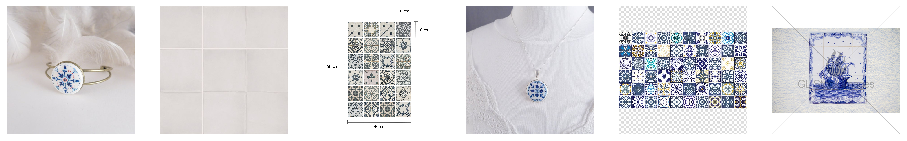

Random sample of high (enough) contrast files - they made it!


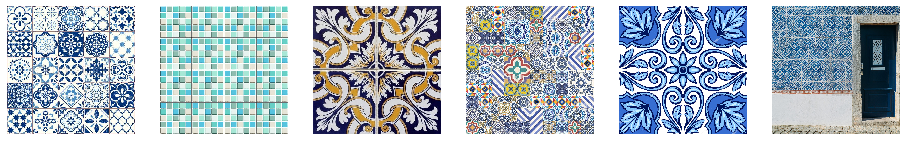

Total files: 279, out of them of high enough contrast: 229.



Working on dataset/google/portuguese tiles folder.


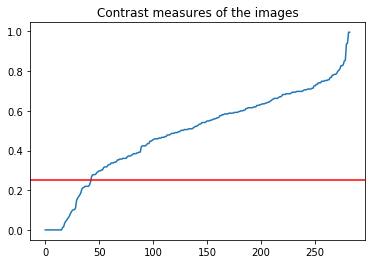

Random sample of low-contrast files - they didn't make it.


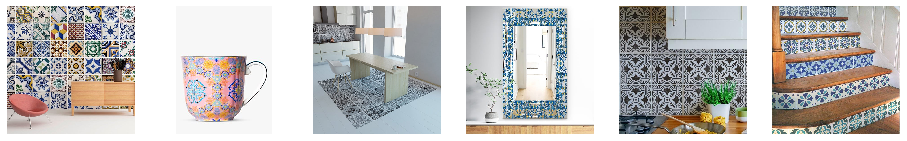

Random sample of high (enough) contrast files - they made it!


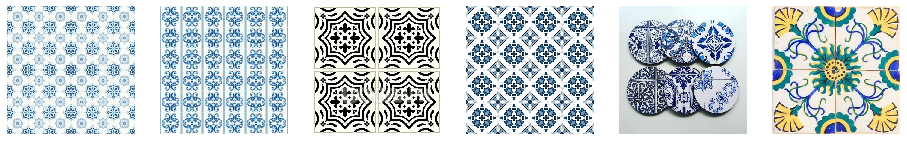

Total files: 283, out of them of high enough contrast: 240.



Working on dataset/bing/azulejo folder.


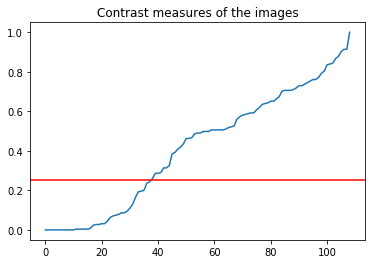

Random sample of low-contrast files - they didn't make it.


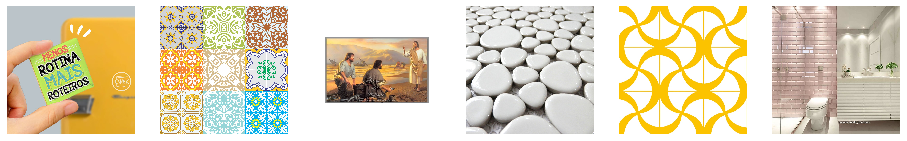

Random sample of high (enough) contrast files - they made it!


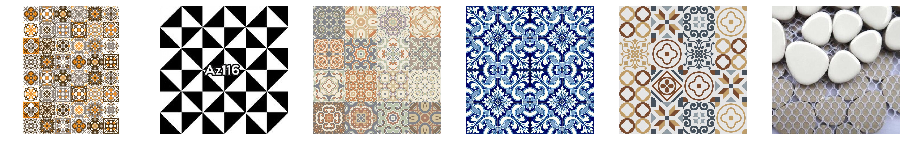

Total files: 109, out of them of high enough contrast: 71.



Working on dataset/bing/hand painted tile folder.


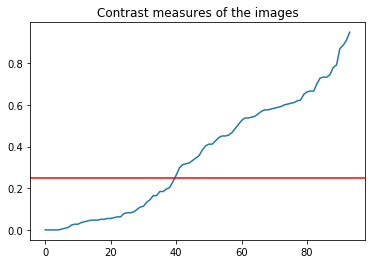

Random sample of low-contrast files - they didn't make it.


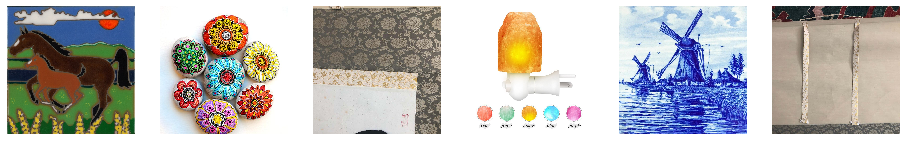

Random sample of high (enough) contrast files - they made it!


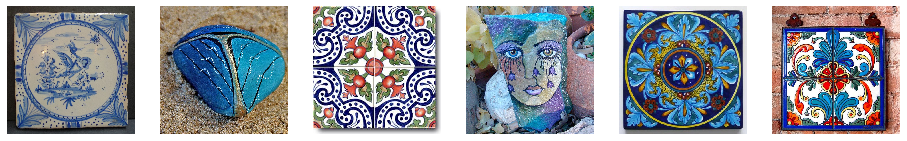

Total files: 94, out of them of high enough contrast: 54.



Working on dataset/bing/handmade tile folder.


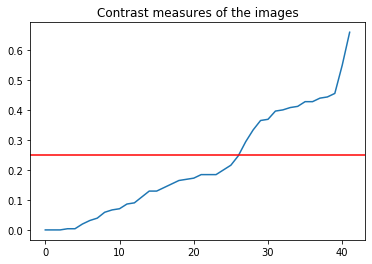

Random sample of low-contrast files - they didn't make it.


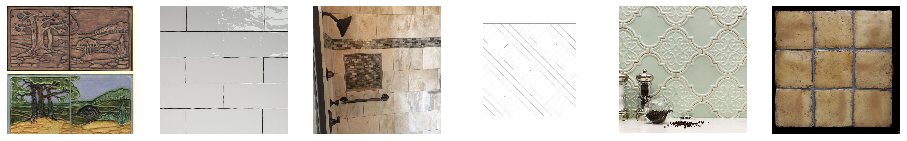

Random sample of high (enough) contrast files - they made it!


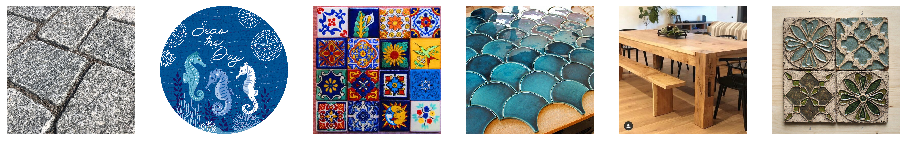

Total files: 42, out of them of high enough contrast: 15.



Working on dataset/bing/portuguese tile folder.


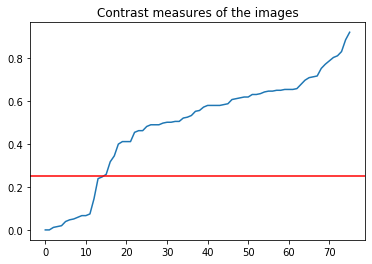

Random sample of low-contrast files - they didn't make it.


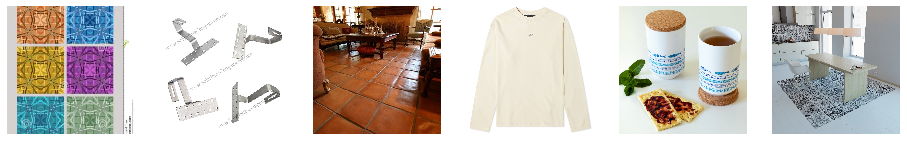

Random sample of high (enough) contrast files - they made it!


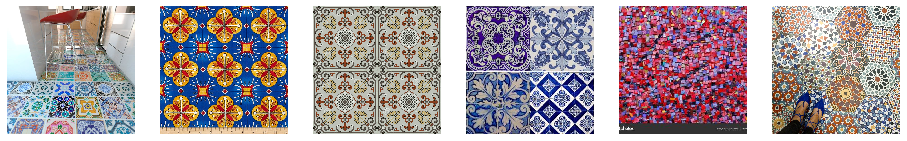

Total files: 76, out of them of high enough contrast: 61.





In [4]:
plot_sample = 6

for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    files = [_.strip() for _ in open('lists/square_{}.txt'.format(folder.replace('/', '-')), 'r').readlines()]
    sample_contrasting = image_selection.get_contrast_imgs(files, folder)
    sample_other = [_ for _ in files if _ not in sample_contrasting]
    print('Random sample of low-contrast files - they didn\'t make it.')
    Tile.plot_grid(
        [
            Tile(cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]) 
            for img_file in
            np.random.choice(sample_other, min(plot_sample, len(sample_other)), replace=False)
        ],
        cols=6
    )
    
    print('Random sample of high (enough) contrast files - they made it!')
    Tile.plot_grid(
        [
            Tile(cv2.imread('{}/{}'.format(folder, img_file))[...,::-1]) 
            for img_file in
            np.random.choice(sample_contrasting, min(plot_sample, len(sample_contrasting)), replace=False)
        ],
        cols=6
    )
    
    print('Total files: {}, out of them of high enough contrast: {}.'.format(len(files), len(sample_contrasting)))
    
    with open('lists/contrasting_{}.txt'.format(folder.replace('/', '-')), 'w') as filehandle:
        for filename in sample_contrasting:
            filehandle.write('%s\n' % filename)
    print('\n\n')